In [7]:
"""
24.Shading correction using rolling ball background subtraction
non-uniform illumination correction
"""

### Method 1

import cv2
import numpy as np

img = cv2.imread("images/Alloy_gradient.jpg", 1)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_img)

clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8, 8))
clahe_img = clahe.apply(l)
CLAHE_img = cv2.merge((clahe_img, a, b))

corrected_img = cv2.cvtColor(CLAHE_img, cv2.COLOR_LAB2RGB)

print(img.shape)

(484, 694, 3)


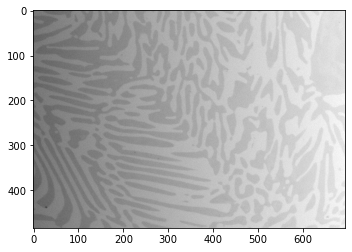

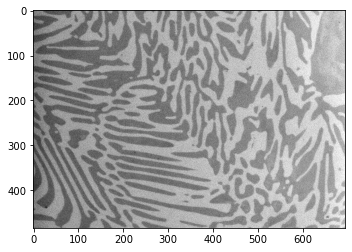

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(corrected_img)

In [12]:

### Method 2

from cv2_rolling_ball import subtract_background_rolling_ball

img = cv2.imread("images/Alloy_gradient.jpg", 0)

radius = 30
final_image, background = subtract_background_rolling_ball(img,
                                                          radius,
                                                          light_background=True,
                                                          use_paraboloid=False,
                                                          do_presmooth=True)
clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8, 8))
clahe_img = clahe.apply(final_image)


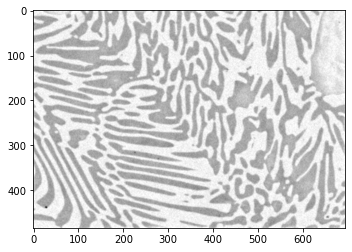

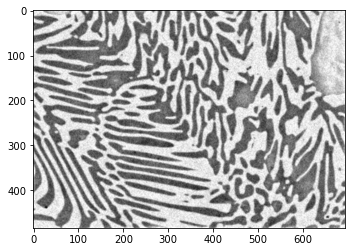

In [13]:
plt.figure()
plt.imshow(final_image,cmap="gray")
plt.figure()
plt.imshow(clahe_img,cmap="gray")